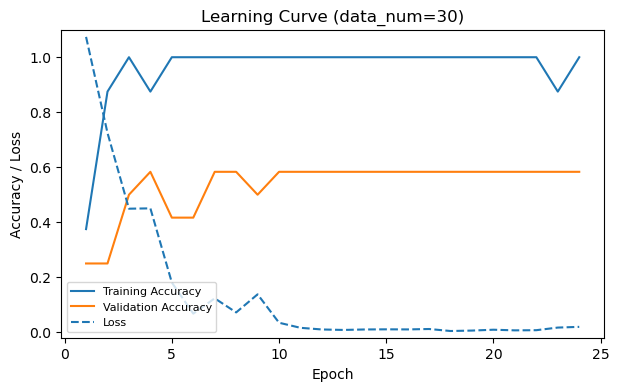

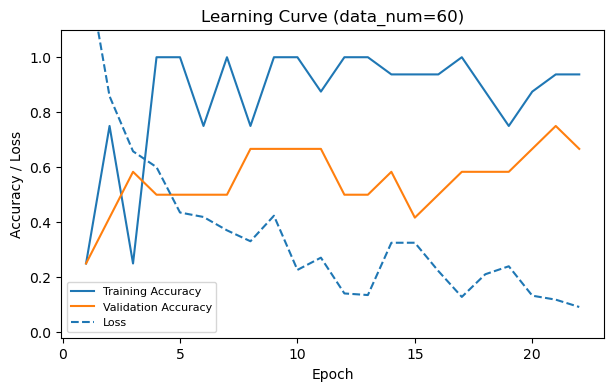

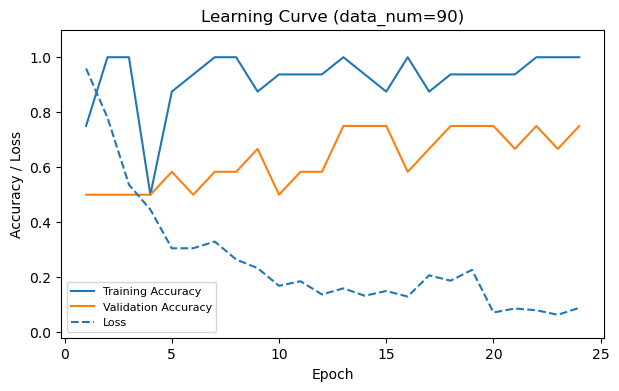

In [32]:
# 学習曲線を使用したバイアスと分散の問題の診断
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('acc.csv')

# 保存データ先
save_dir = './'

# データ数ごとにグラフを分けてプロット
for data_num in [30, 60, 90]:    # データを抽出
    data = df[df['data_num'] == data_num]

    # 新しい図を作成
    plt.figure(figsize=(7, 4))  # Set the figure size to (8, 4)

    # エポック数とaccuracyの折れ線グラフをプロット
    plt.plot(data['epoch'], data['train_acc'], label='Training Accuracy')

    # エポック数とval_accの折れ線グラフをプロット
    plt.plot(data['epoch'], data['val_acc'], label='Validation Accuracy')

    # エポック数とlossの折れ線グラフをプロット
    plt.plot(data['epoch'], data['loss'], linestyle='dashed', color='C0', label='Loss')

    # グラフのタイトルと軸ラベルを設定
    plt.title(f'Learning Curve (data_num={data_num})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')

    # y軸を一定に固定
    plt.ylim([-0.02, 1.1])  # Set the y-axis limits from 0 to 1

    # # 凡例を表示
    plt.legend(prop={'size': 8})  # Set the legend size to 8

    # グラフを保存
    plt.savefig(f'{save_dir}/learning_curve_data_num_{data_num}.png')

    # グラフを表示
    plt.show()


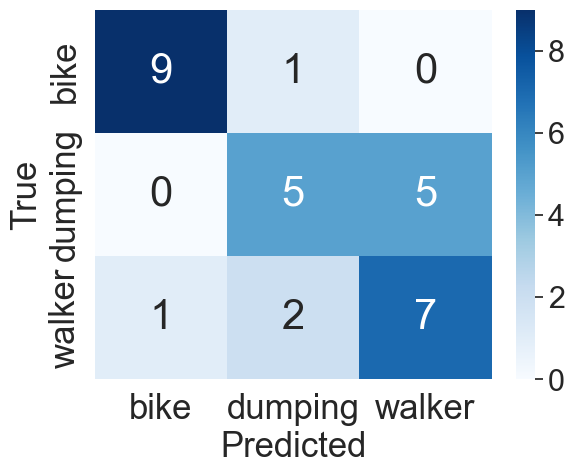

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import matplotlib as mpl

# 保存データ先
save_dir = './'

# 評価結果のjsonファイルを読み込む
pred_path = "./"
pred_result_json_name = "val_10_pred.json"
json_file_path = os.path.join(pred_path, pred_result_json_name)

with open(json_file_path, "r") as f:
    test_results_dict = json.load(f)

    # 'pred_label'と'gt_label'の値を抜き出して一つのリストにまとめる
    y_pred = [item['pred_label'][0] for item in test_results_dict]
    y_true = [item['gt_label'][0] for item in test_results_dict]

# 混同行列を作成
cm = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(6, 5))  # Set the figure size to (8, 6)
# 混同行列を表示
sns.set(font_scale=2)  # Increase the font size
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"size": 30},
            xticklabels=["bike", "dumping", "walker"], yticklabels=["bike", "dumping", "walker"])
plt.xlabel('Predicted', fontsize=25)  # Increase the label font size
plt.ylabel('True', fontsize=25)  # Increase the label font size
plt.xticks(fontsize=25)  # Increase the x-axis font size
plt.yticks(fontsize=25)  # Increase the y-axis font size

# グラフを保存
plt.savefig(f'{save_dir}/confusion_matrix.png')

plt.show()

In [5]:
# ラベル1を正解とした場合の適合率、再現率、F1スコアを計算
from sklearn.metrics import classification_report

# 適合率、再現率、F1スコアを計算
report = classification_report(y_true, y_pred, target_names=["bike", "dumping", "walker"])
print(report)

# 表を枠線付きで表示
import matplotlib.pyplot as plt
import pandas as pd

# データフレームを作成
df = pd.DataFrame({ '正答率': [0.70],
                    '再現率': [0.50],
                    '適合率': [0.62]},
                    index=["dumping"])

# 表を表示
df.style.set_properties(**{'border': '1px solid black',
                           'text-align': 'center'}).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px solid black'),
              ('text-align', 'center')]}])

# # 表を画像で保存
# df.style.set_properties(**{'border': '1px solid black',
#                            'text-align': 'center'}).set_table_styles([{
#     'selector': 'th',
#     'props': [('border', '1px solid black'),
#               ('text-align', 'center')]}]).to_html('table.html')

# # 表を画像で保存
# import imgkit
# imgkit.from_file('table.html', 'table.png')


              precision    recall  f1-score   support

        bike       0.90      0.90      0.90        10
     dumping       0.62      0.50      0.56        10
      walker       0.58      0.70      0.64        10

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



,正答率,再現率,適合率
dumping,0.700000,0.500000,0.620000
